In [22]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
)
from ripple_heterogeneity.readout import assembly_multi_region_ind_detect_reactivation
from ripple_heterogeneity.assembly import assembly_reactivation, find_sig_assembly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [8]:
df_sessions = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
sessions_to_skip = [r"Z:\Data\AYAold\AYA10\day12"]
df_sessions = df_sessions[~np.in1d(df_sessions.basepath,sessions_to_skip)]


In [29]:
# basepath = r"Z:\Data\FujisawaS\EE\EE0627fm"
# assembly_react = assembly_reactivation.AssemblyReact(
#     basepath=basepath,
# )
# assembly_react.load_data()
# assembly_react.restrict_epochs_to_pre_task_post()
# assembly_react.get_weights(epoch=assembly_react.epochs[1])
# assembly_react.plot()
# plt.show()

## Run main analysis

#### different versions
* v1: restricted to nrem and zmat dt = 2ms
* v2: not restricted to nrem and zmat dt = 5ms

In [ ]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_ind_detect_reactivation_v2"

batch_analysis.run(
    df_sessions,
    save_path,
    assembly_multi_region_ind_detect_reactivation.run,
    parallel=True,
    verbose=True,
    num_cores=12,
    restrict_to_nrem=False
)

## load in results

In [214]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_ind_detect_reactivation_v2"

results_df, peth = assembly_multi_region_ind_detect_reactivation.load_results(save_path)

(-5.0, 10.0)

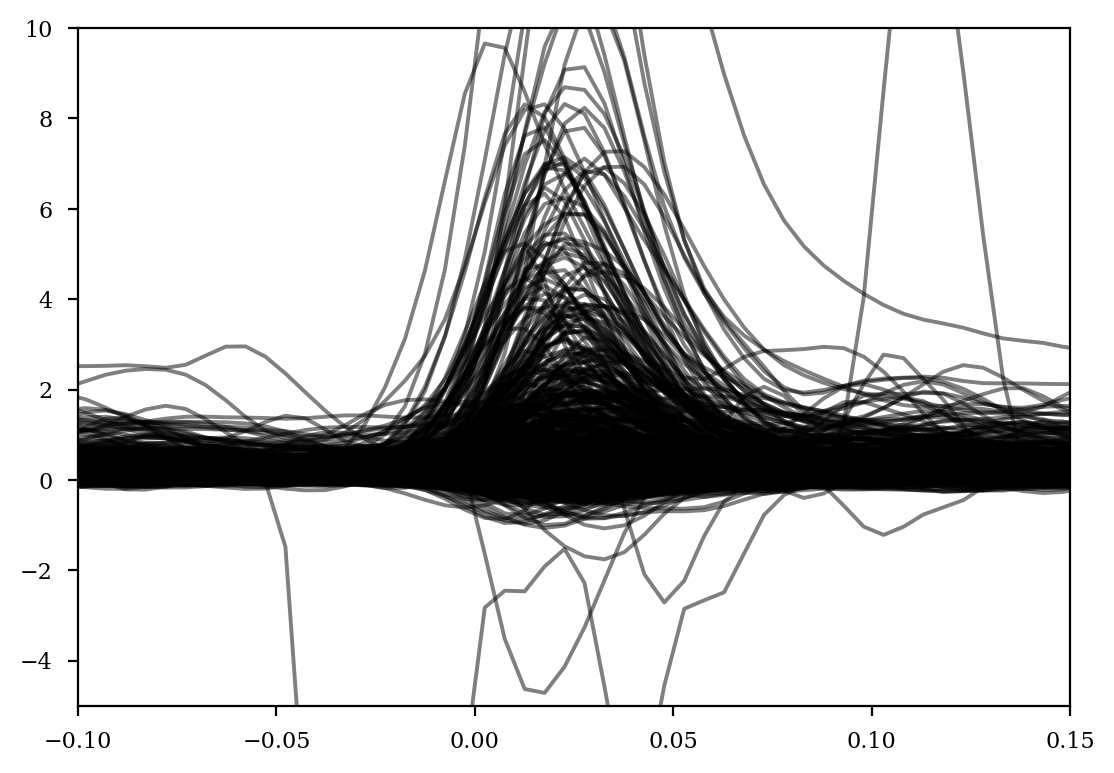

In [215]:
peth.plot(legend=False,color="k",alpha=.5)
plt.xlim(-.1,.15)
plt.ylim(-5,10)

### add other metrics

In [396]:
peth_zscore = (peth - np.nanmean(peth,axis=0)) / np.nanstd(peth,axis=0)

results_df["response_50ms"] = peth[(peth.index > 0) & (peth.index < 0.05)].mean(axis=0).values
results_df["response_50ms_peak"] = peth[(peth.index > 0) & (peth.index < 0.05)].max(axis=0).values

results_df["response_50ms_zscore"] = peth_zscore[(peth_zscore.index > 0) & (peth_zscore.index < 0.05)].mean(axis=0).values
results_df["response_50ms_peak_zscore"] = peth_zscore[(peth_zscore.index > 0) & (peth_zscore.index < 0.05)].max(axis=0).values

results_df["response_100ms_zscore"] = peth_zscore[(peth_zscore.index > 0) & (peth_zscore.index < 0.1)].mean(axis=0).values


### normalize cross region labels

In [217]:
results_df.cross_region_label = results_df.cross_region_label.replace("Deep_EC1|EC2|EC3|EC4|EC5|MEC","CA1deep-MEC")
results_df.cross_region_label = results_df.cross_region_label.replace("Superficial_EC1|EC2|EC3|EC4|EC5|MEC","CA1sup-MEC")
results_df.cross_region_label = results_df.cross_region_label.replace("Deep_PFC","CA1deep-PFC")
results_df.cross_region_label = results_df.cross_region_label.replace("Superficial_PFC","CA1sup-PFC")
results_df.cross_region_label.unique()

array(['CA1sup-MEC', 'CA1deep-MEC', 'CA1deep-PFC', 'CA1sup-PFC'],
      dtype=object)

In [218]:
results_df

,response,assembly_n,epoch,deepSuperficial,cross_region_label,n_ca1,n_cortex,n_ca1_total,n_cortex_total,n_cells_total,basepath,response_50ms,response_50ms_peak,response_50ms_zscore,response_50ms_peak_zscore
0,0.064746,0,pre,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,0.099339,0.139108,2.818369,4.218762
1,-0.034400,0,post,Superficial,CA1sup-MEC,1,3,1,10,11,Z:\Data\AYAold\AYA7\day19,-0.013396,-0.003155,-0.289047,-0.213288
2,-0.122429,0,pre,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,-0.200003,-0.101239,-3.454506,-1.591344
3,0.105341,0,post,Deep,CA1deep-MEC,1,4,18,38,56,Z:\Data\AYAold\AYA7\day20,0.118725,0.179310,0.768586,1.456485
4,0.112881,0,pre,Deep,CA1deep-MEC,2,14,19,50,69,Z:\Data\AYAold\AYA7\day24,0.128494,0.195193,0.504535,1.746742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,-0.157210,1,pre,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,-0.271877,-0.135793,-3.630638,-1.274857
974,0.537182,0,post,Deep,CA1deep-PFC,2,2,14,16,30,Z:\Data\ORproject\OR18\day2,0.900575,1.272946,3.935325,5.821585
975,0.113966,1,post,Deep,CA1deep-PFC,3,6,14,16,30,Z:\Data\ORproject\OR18\day2,0.193342,0.269381,2.951922,4.102841
976,0.223260,0,pre,Superficial,CA1sup-PFC,1,3,3,16,19,Z:\Data\ORproject\OR18\day2,0.356174,0.521184,3.423498,5.431107


In [ ]:
results_df.basepath.value_counts()


In [219]:
results_df.query("basepath.str.contains('HMC2')").basepath.value_counts()

Z:\Data\HMC2\day9     16
Z:\Data\HMC2\day6     14
Z:\Data\HMC2\day4     12
Z:\Data\HMC2\day5     10
Z:\Data\HMC2\day7     10
Z:\Data\HMC2\day8      6
Z:\Data\HMC2\day11     4
Z:\Data\HMC2\day3      4
Name: basepath, dtype: int64

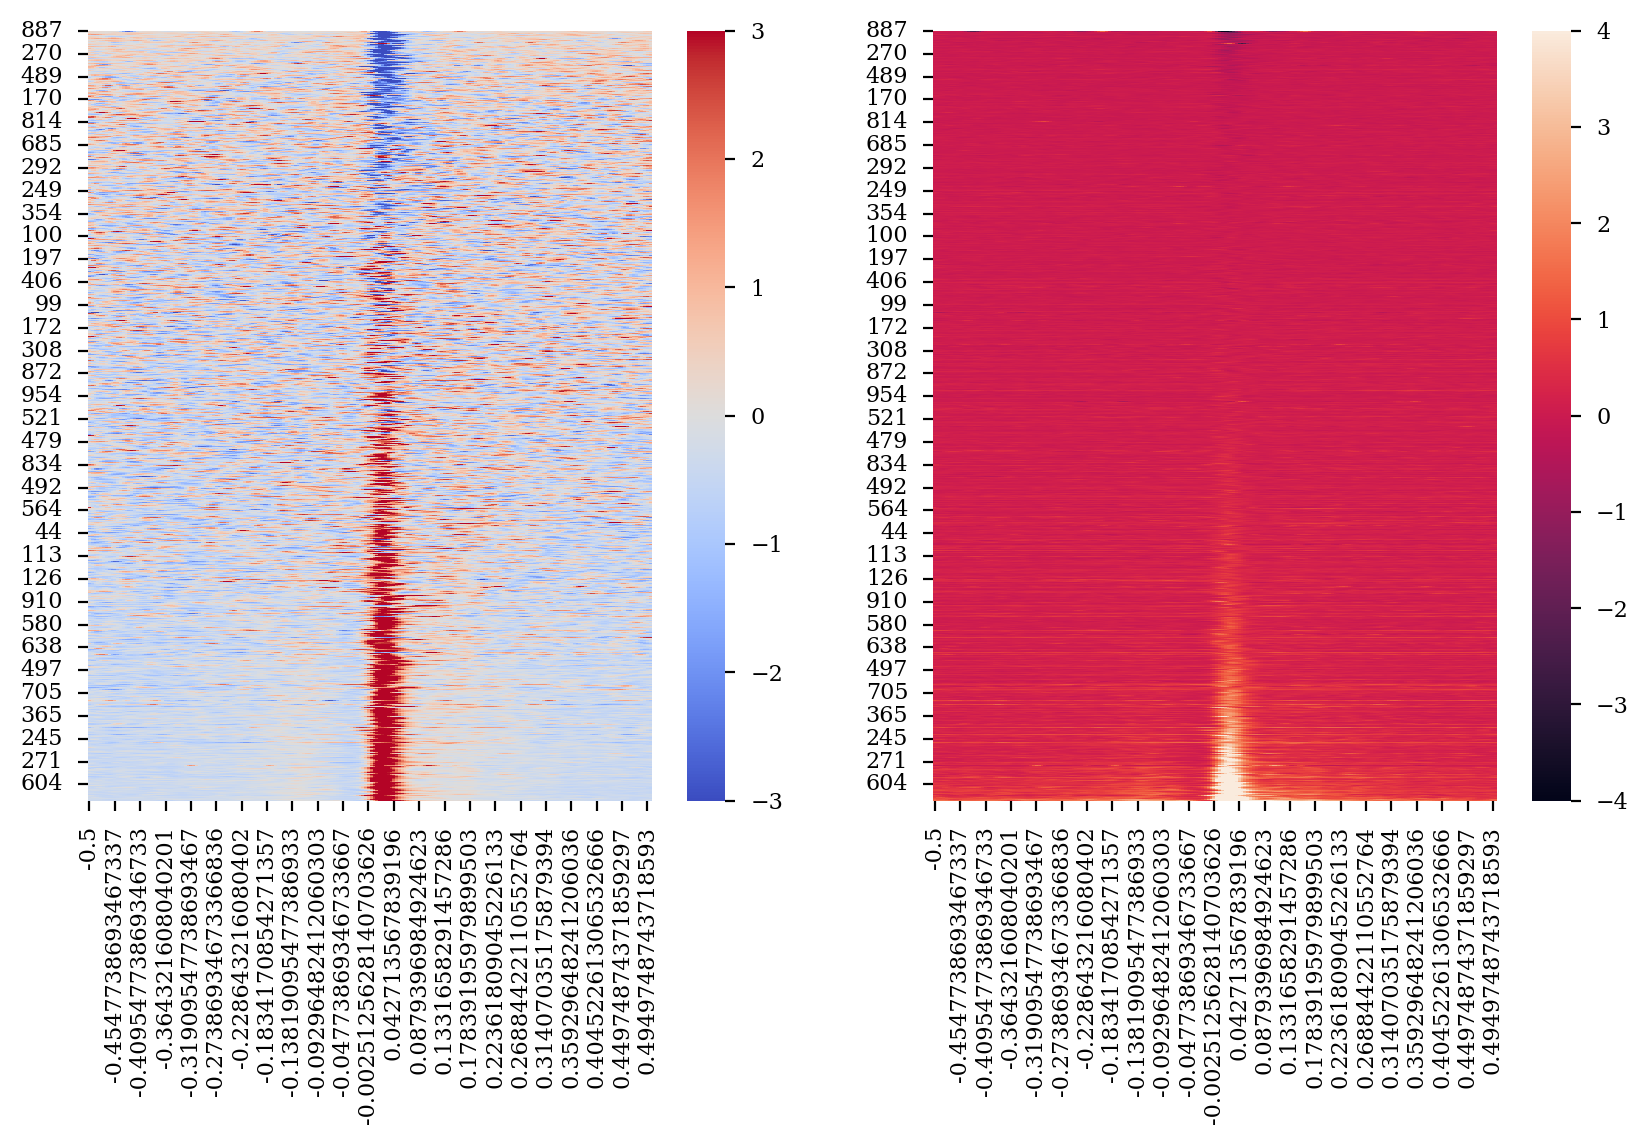

In [246]:
sort_idx = np.argsort(results_df.response)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(peth_zscore.iloc[:, sort_idx].T,vmax=3,vmin=-3,cmap="coolwarm",ax=ax[0])

sns.heatmap(peth.iloc[:, sort_idx].T,vmin=-4,vmax=4,ax=ax[1])
plt.show()

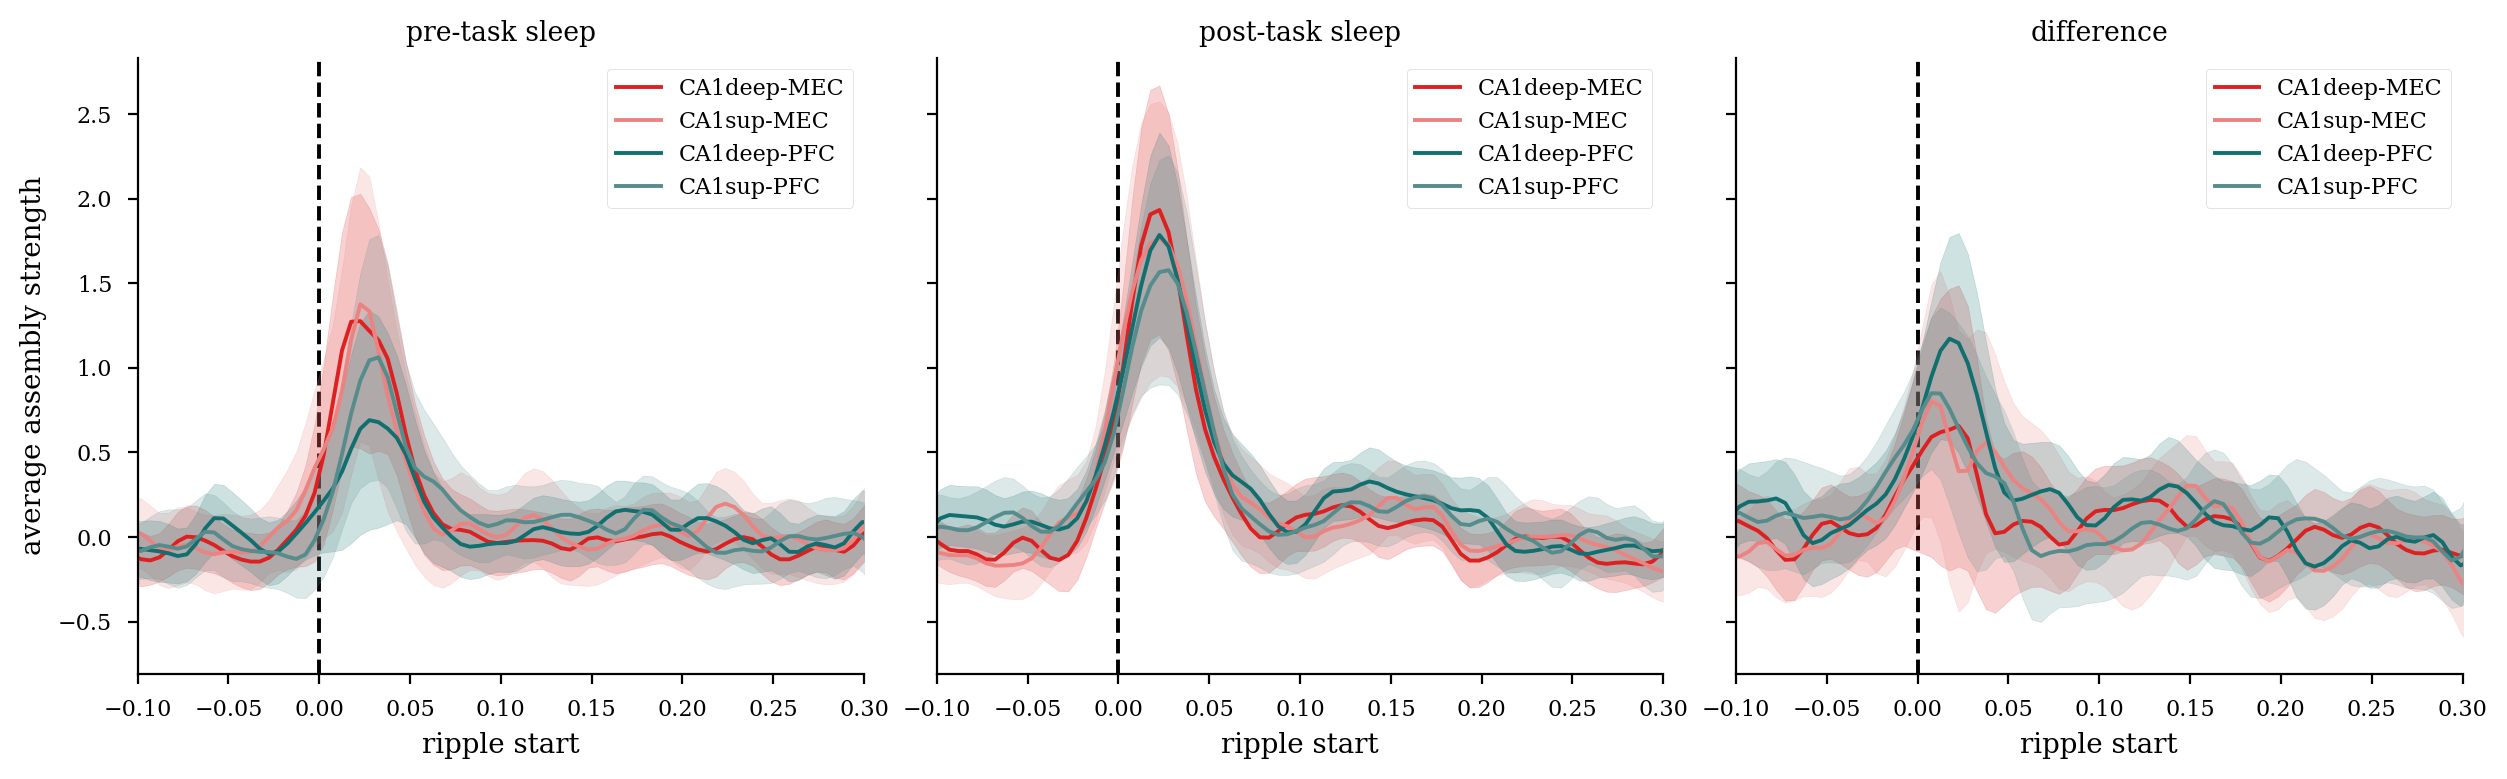

In [451]:
def plot_this(
    peth, pre_idx, post_idx, cross_region_label, cross_region_idx, group_colors, ax
):
    
    pre = np.nanmean(peth.iloc[:, pre_idx & cross_region_idx], axis=1)
    post = np.nanmean(peth.iloc[:, post_idx & cross_region_idx], axis=1)


    ax[0].plot(
        peth.index,
        pre,
        color=group_colors[cross_region_label],
        label=cross_region_label,
    )
    lower, upper = functions.confidence_intervals(
        peth.iloc[:, pre_idx & cross_region_idx].values.T,conf=.99
    )
    ax[0].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

    ax[1].plot(
        peth.index,
        post,
        color=group_colors[cross_region_label],
        label=cross_region_label,
    )
    lower, upper = functions.confidence_intervals(
        peth.iloc[:, post_idx & cross_region_idx].values.T,conf=.99
    )
    ax[1].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

    ax[2].plot(
        peth.index,
        post - pre,
        color=group_colors[cross_region_label],
        label=cross_region_label,
    )
    lower, upper = functions.confidence_intervals(
            (peth.iloc[:, post_idx & cross_region_idx].values - peth.iloc[:, pre_idx & cross_region_idx].values).T,conf=.99
    )
    ax[2].fill_between(
        peth.index, lower, upper, color=group_colors[cross_region_label], alpha=0.2
    )

group_colors = {
    "CA1deep-MEC": "#de2020",
    "CA1sup-MEC": "#eb8383",
    "CA1deep-PFC": "#116f70",
    "CA1sup-PFC": "#568c8c",
}
sns.set_palette(sns.color_palette(group_colors.values()))

titles = ["pre-task sleep", "post-task sleep", "difference"]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.subplots_adjust(hspace=0.00, wspace=0.1)
ax = ax.ravel()

pre_idx = (results_df.epoch == "pre").values
post_idx = (results_df.epoch == "post").values
deep_mec_idx = (results_df.cross_region_label == "CA1deep-MEC").values
sup_mec_idx = (results_df.cross_region_label == "CA1sup-MEC").values
deep_pfc_idx = (results_df.cross_region_label == "CA1deep-PFC").values
sup_pfc_idx = (results_df.cross_region_label == "CA1sup-PFC").values

# pre_idx = pre_idx & (results_df.n_ca1.values>1) & (results_df.n_cortex.values>1)
# post_idx = post_idx & (results_df.n_ca1.values>1) & (results_df.n_cortex.values>1)

plot_this(peth_zscore, pre_idx, post_idx, "CA1deep-MEC", deep_mec_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1sup-MEC", sup_mec_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1deep-PFC", deep_pfc_idx, group_colors, ax)
plot_this(peth_zscore, pre_idx, post_idx, "CA1sup-PFC", sup_pfc_idx, group_colors, ax)
# ax[0].legend()
sns.despine()
ax[0].set_ylabel("average assembly strength")

for i, title in enumerate(titles):
    ax[i].set_title(title)
    ax[i].set_xlim(-0.1, 0.3)
    # ax[i].set_ylim(-3, 3)

    ax[i].set_xlabel("ripple start")
    ax[i].axvline(0, color="k", linestyle="--", zorder=-100)
    ax[i].legend()


<AxesSubplot: >

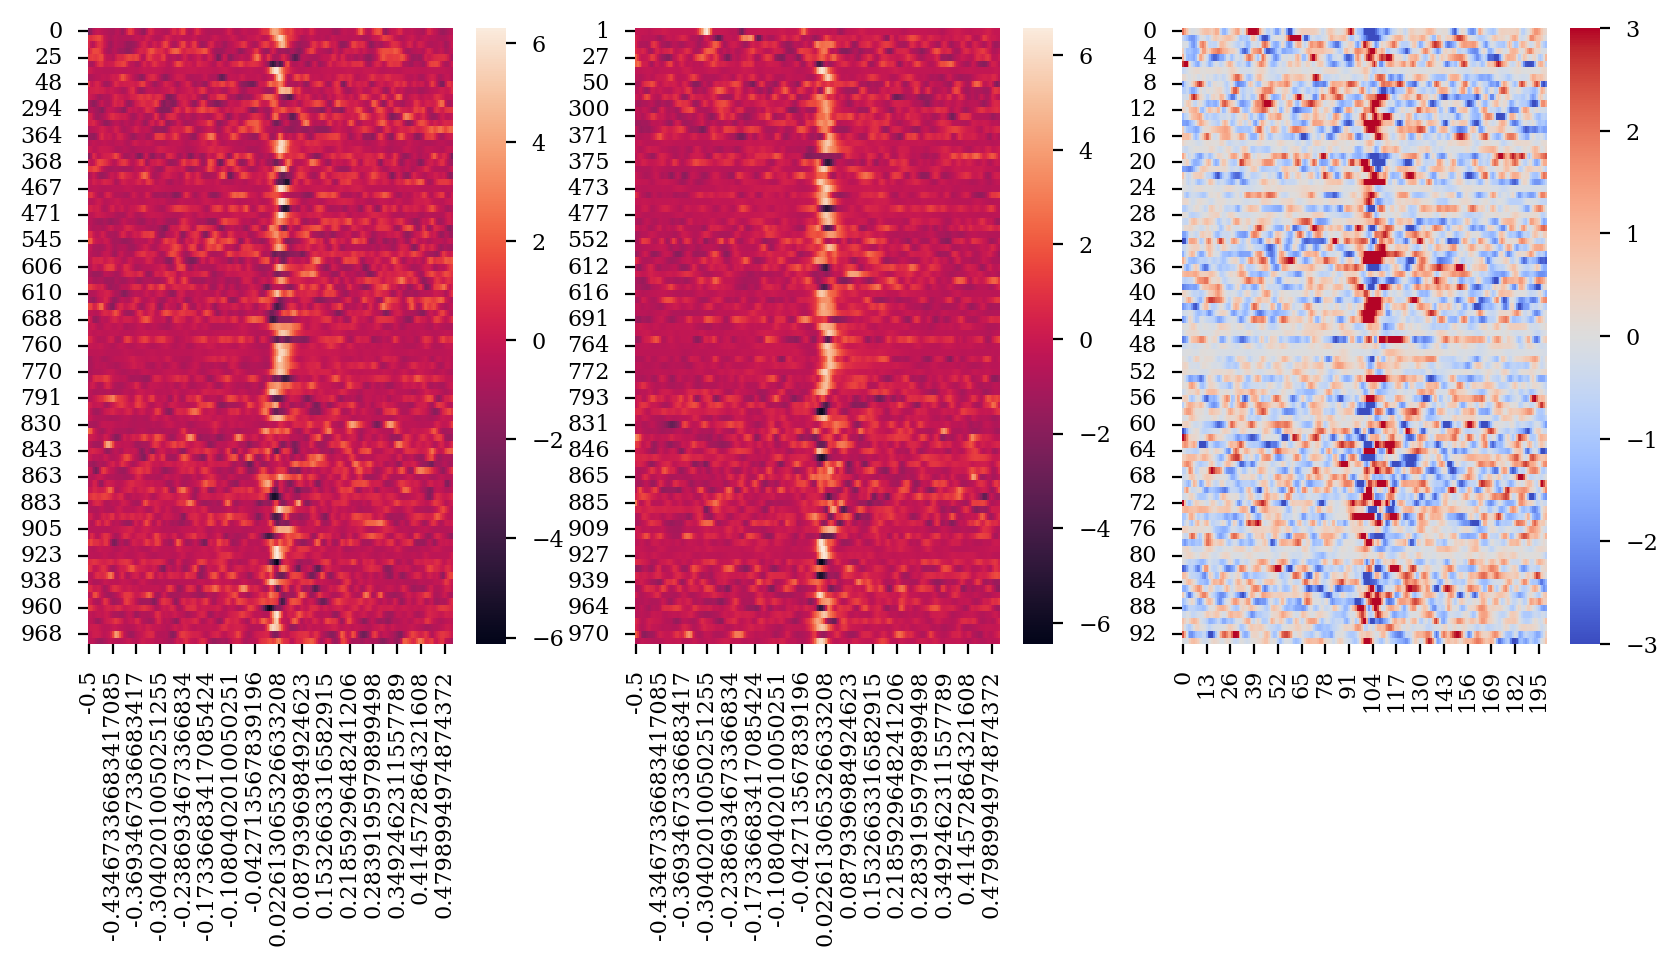

In [439]:
fig,ax = plt.subplots(1,3,figsize=(10,4))
sns.heatmap(peth_zscore.iloc[:, pre_idx & sup_mec_idx].T,ax=ax[0])
sns.heatmap(peth_zscore.iloc[:, post_idx & sup_mec_idx].T,ax=ax[1])
sns.heatmap((peth_zscore.iloc[:, post_idx & sup_mec_idx].values - peth_zscore.iloc[:, pre_idx & sup_mec_idx].values).T,ax=ax[2],cmap="coolwarm",vmax=3,vmin=-3)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_CA1deep-PFC vs. 1_CA1sup-PFC: Mann-Whitney-Wilcoxon test two-sided, P_val:4.497e-01 U_stat=8.897e+03
1_CA1deep-MEC vs. 1_CA1sup-MEC: Mann-Whitney-Wilcoxon test two-sided, P_val:8.632e-01 U_stat=6.288e+03


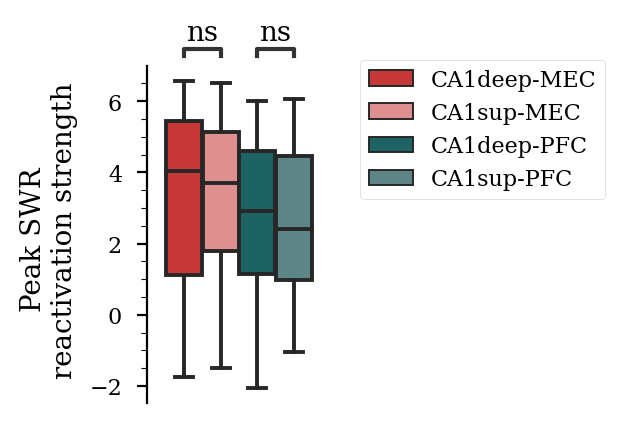

In [398]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    y="response_50ms_peak_zscore",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df.query("epoch=='post'"),
    showfliers=False,
)
plt.ylabel("Peak SWR \n reactivation strength")

ax = plt.gca()
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(bbox_to_anchor=(1.1, 1.05))

ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.set_xlabel("")
# ax.legend("")

box_pairs = [
    ((1, "CA1deep-MEC"),(1, "CA1sup-MEC")),
    ((1, "CA1deep-PFC"),(1, "CA1sup-PFC"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df.query("epoch=='post'"),
    y="response_50ms_peak_zscore",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.show()

In [400]:
def ratio(a, b):
    return (a - b) / (a + b)

def ratio_2(a, b):
    return (a - b) / b

def ratio_3(a, b):
    return (a - b)

def ratio_4(a, b):
    return (a / b)

results_df_pivot = results_df.pivot(
    index=["basepath", "assembly_n", "cross_region_label"],
    columns="epoch",
    values=["response","response_50ms","response_50ms_peak","response_50ms_zscore","response_50ms_peak_zscore","response_100ms_zscore"],
).reset_index()
results_df_pivot.columns = results_df_pivot.columns.map('_'.join).str.strip('_')
results_df_pivot["constant"] = 1
results_df_pivot["(post-pre)/(post+pre)"] = ratio(results_df_pivot.response_50ms_peak_zscore_post + 100, results_df_pivot.response_50ms_peak_zscore_pre + 100)
results_df_pivot["(post-pre)/pre"] = ratio_2(results_df_pivot.response_50ms_peak_zscore_post, results_df_pivot.response_50ms_peak_zscore_pre)
results_df_pivot["(post/pre)"] = ratio_4(results_df_pivot.response_50ms_peak_zscore_post, results_df_pivot.response_50ms_peak_zscore_pre)
results_df_pivot["(post/pre)_100ms"] = ratio_4(results_df_pivot.response_100ms_zscore_post, results_df_pivot.response_100ms_zscore_pre)

# results_df_pivot["(post-pre)"] = results_df_pivot.post - results_df_pivot.pre

results_df_pivot

,basepath,assembly_n,cross_region_label,response_post,response_pre,response_50ms_post,response_50ms_pre,response_50ms_peak_post,response_50ms_peak_pre,response_50ms_zscore_post,response_50ms_zscore_pre,response_50ms_peak_zscore_post,response_50ms_peak_zscore_pre,response_100ms_zscore_post,response_100ms_zscore_pre,constant,(post-pre)/(post+pre),(post-pre)/pre,(post/pre),(post/pre)_100ms
0,Z:\Data\AYAold\AYA7\day19,0,CA1sup-MEC,-0.034400,0.064746,-0.013396,0.099339,-0.003155,0.139108,-0.289047,2.818369,-0.213288,4.218762,-0.444431,1.600209,1,-0.021725,-1.050557,-0.050557,-0.277733
1,Z:\Data\AYAold\AYA7\day20,0,CA1deep-MEC,0.105341,-0.122429,0.118725,-0.200003,0.179310,-0.101239,0.768586,-3.454506,1.456485,-1.591344,0.616621,-1.991099,1,0.015249,-1.915255,-0.915255,-0.309689
2,Z:\Data\AYAold\AYA7\day24,0,CA1deep-MEC,0.068542,0.112881,0.068012,0.128494,0.144740,0.195193,-1.040580,0.504535,0.030511,1.746742,-1.033177,0.213761,1,-0.008506,-0.982533,0.017467,-4.833329
3,Z:\Data\AYAold\AYA7\day24,1,CA1deep-MEC,1.823065,1.212459,3.124487,1.958060,4.638520,2.856946,3.978826,3.974301,6.197253,6.152507,2.071927,2.167540,1,0.000211,0.007273,1.007273,0.955889
4,Z:\Data\AYAold\AYA7\day24,2,CA1deep-MEC,3.007731,3.085714,5.271351,5.244963,7.521664,7.803094,4.015611,3.927266,5.990827,6.144670,2.028714,2.055614,1,-0.000725,-0.025037,0.974963,0.986914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Z:\Data\Kenji\i01_maze01_MS.001_003,0,CA1sup-MEC,0.024873,-0.036522,0.016830,-0.081552,0.115622,-0.034094,-0.608334,-0.995204,0.531996,-0.157466,-0.515502,-0.200336,1,0.003441,-4.378474,-3.378474,2.573181
485,Z:\Data\Kenji\i01_maze01_MS.001_003,1,CA1sup-MEC,1.052810,0.263935,1.854403,0.347482,3.351451,0.559098,2.944251,1.636868,5.888184,3.068505,1.367925,1.071654,1,0.013494,0.918910,1.918910,1.276461
486,Z:\Data\ORproject\OR18\day2,0,CA1deep-PFC,0.537182,0.999457,0.900575,1.568001,1.272946,1.911669,3.935325,4.012416,5.821585,5.094139,2.094543,2.222871,1,0.003449,0.142801,1.142801,0.942269
487,Z:\Data\ORproject\OR18\day2,0,CA1sup-PFC,0.134160,0.223260,0.112503,0.356174,0.139749,0.521184,-0.496861,3.423498,0.029673,5.431107,-0.078342,1.806377,1,-0.026289,-0.994536,0.005464,-0.043370


In [304]:
results_df_pivot = functions.add_animal_id(results_df_pivot)
results_df_pivot["pre_post_ratio"] = results_df_pivot["(post-pre)/(post+pre)"]
results_df_pivot.to_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_ind_detect_react.csv")

<AxesSubplot: xlabel='response_50ms_peak_pre', ylabel='response_50ms_peak_post'>

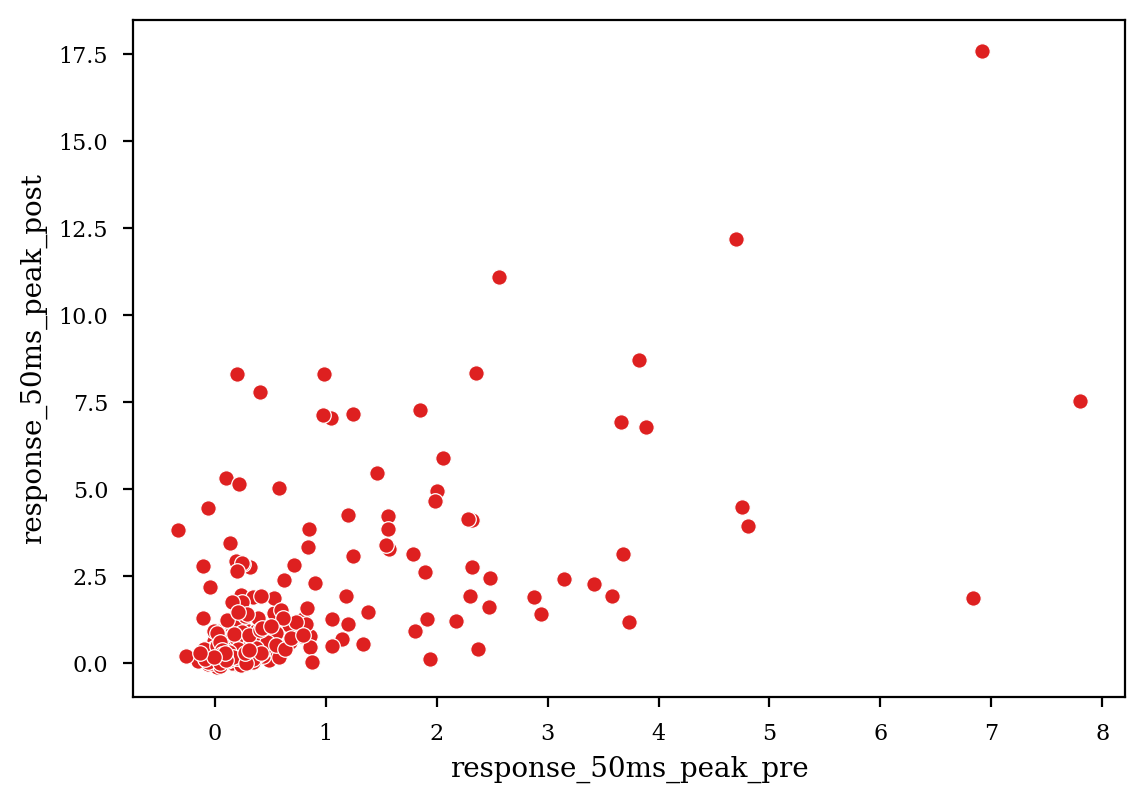

In [288]:
sns.scatterplot(data=results_df_pivot,x="response_50ms_peak_pre",y="response_50ms_peak_post")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_CA1deep-PFC vs. 1_CA1sup-PFC: Mann-Whitney-Wilcoxon test two-sided, P_val:2.143e-02 U_stat=7.034e+03
1_CA1deep-MEC vs. 1_CA1sup-MEC: Mann-Whitney-Wilcoxon test two-sided, P_val:8.794e-01 U_stat=6.130e+03


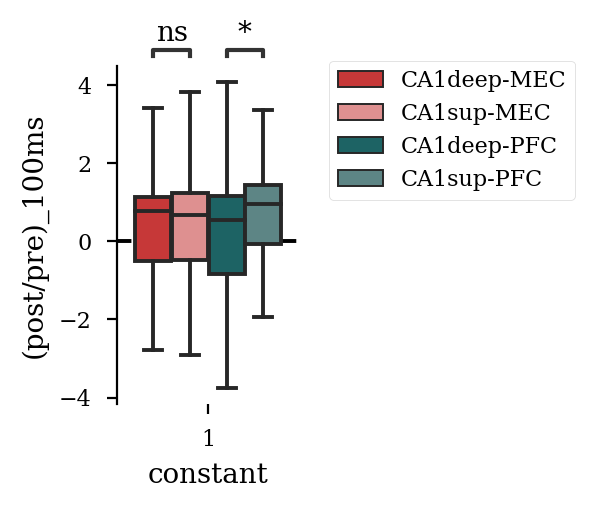

In [401]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    y="(post/pre)_100ms",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df_pivot,
    showfliers=False,
)
# sns.stripplot(
#     y="(post/pre)_100ms",
#     x="constant",
#     hue="cross_region_label",
#     hue_order=group_colors.keys(),
#     data=results_df_pivot,
#     dodge=True,
#     color="k",
#     s=2
# )
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.axhline(0,color="k",linestyle="--",zorder=-100)
sns.despine(bottom=True)
box_pairs = [
    ((1, "CA1deep-MEC"),(1, "CA1sup-MEC")),
    ((1, "CA1deep-PFC"),(1, "CA1sup-PFC"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df_pivot,
    y="(post/pre)_100ms",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.show()

In [391]:
median_df = results_df_pivot.groupby(["basepath","cross_region_label"])["(post/pre)"].median().reset_index().sort_values(by="(post/pre)")
median_df.query("cross_region_label=='CA1deep-PFC'").sort_values(by="(post/pre)")

,basepath,cross_region_label,(post/pre)
120,Z:\Data\ORproject\OR18\day2,CA1deep-PFC,-1.037737
45,Z:\Data\HMC2\day11,CA1deep-PFC,-0.627553
58,Z:\Data\HMC2\day7,CA1deep-PFC,-0.042148
54,Z:\Data\HMC2\day6,CA1deep-PFC,0.099414
22,Z:\Data\HMC1\day10,CA1deep-PFC,0.223268
50,Z:\Data\HMC2\day5,CA1deep-PFC,0.283209
13,Z:\Data\FujisawaS\EE\EE0627fm,CA1deep-PFC,0.797345
26,Z:\Data\HMC1\day12,CA1deep-PFC,0.836138
48,Z:\Data\HMC2\day4,CA1deep-PFC,0.839837
42,Z:\Data\HMC1\day9,CA1deep-PFC,0.875727


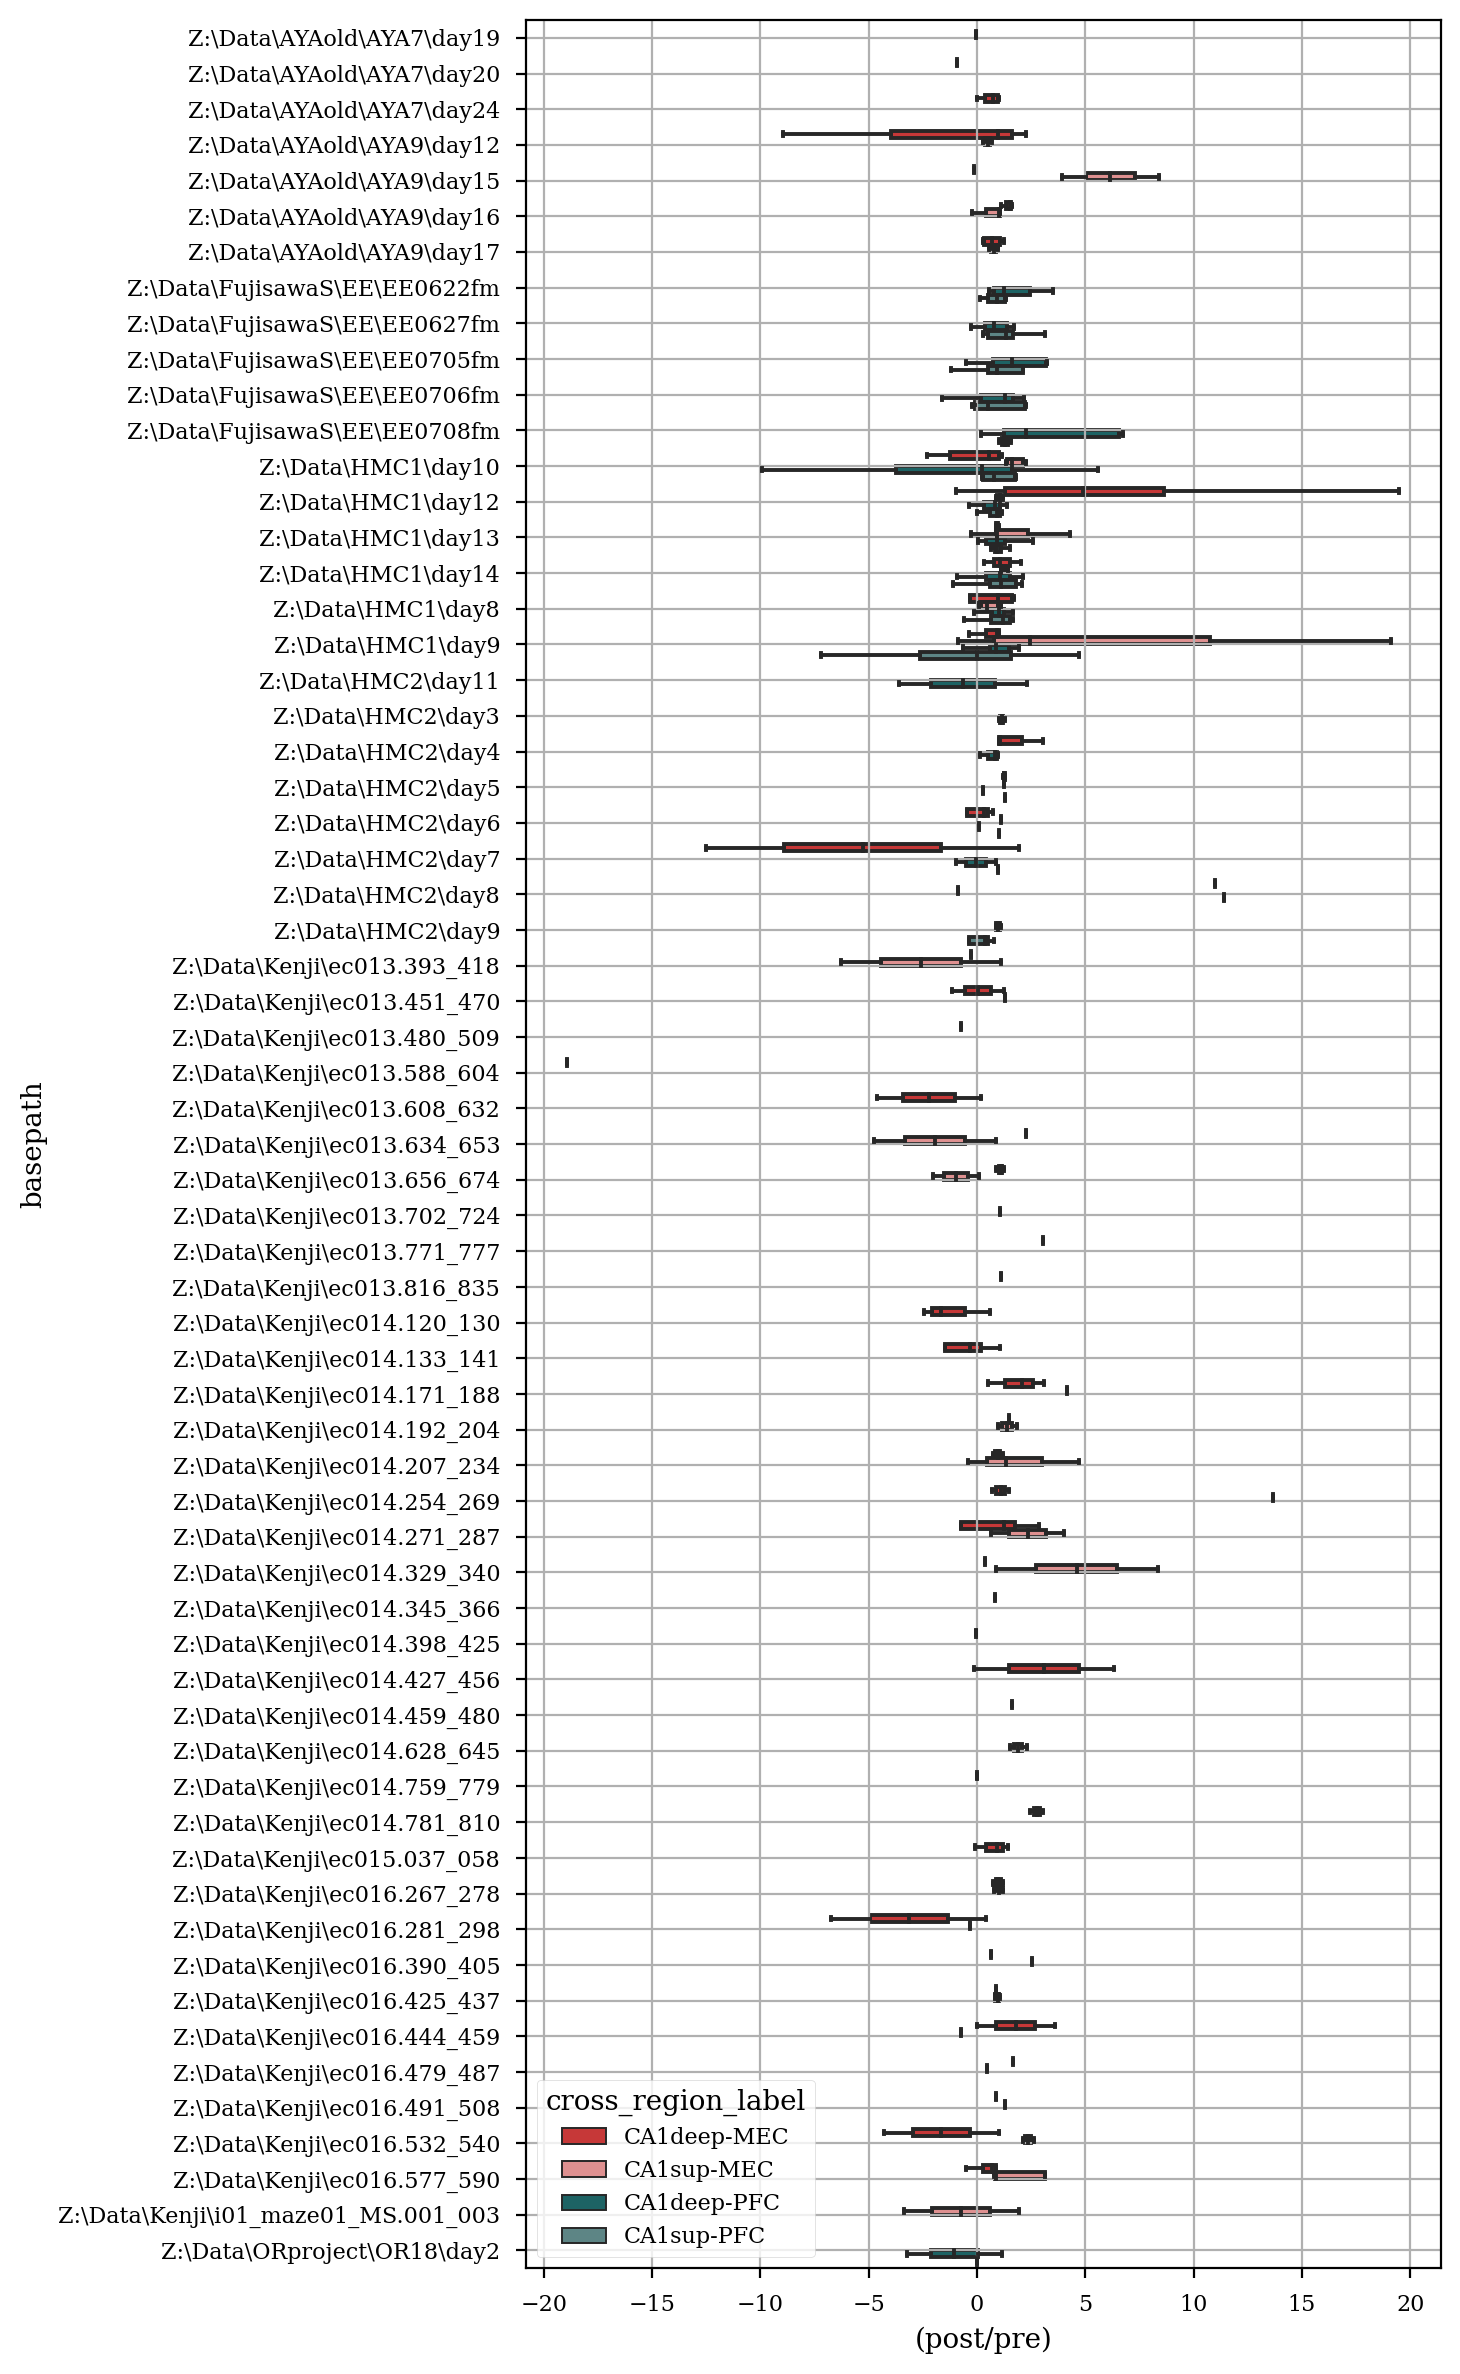

In [381]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=1, subplots=(4, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    x="(post/pre)",
    y="basepath",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=results_df_pivot,
    showfliers=False,
)
plt.grid()

In [365]:
from scipy import stats

temp_df = results_df_pivot.query(
    "cross_region_label.str.contains('CA1deep-MEC|CA1sup-MEC')"
)[["(post-pre)/(post+pre)","(post-pre)/pre", "cross_region_label", "basepath" , "constant"]]
# temp_df["weight"] = 7
# temp_df = functions.reindex_df(temp_df,"weight")

temp_df = temp_df[
    (temp_df.basepath == r"Z:\Data\HMC1\day10")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.171_188")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.133_141")
    | (temp_df.basepath == r"Z:\Data\HMC1\day14")
    | (temp_df.basepath == r"Z:\Data\HMC1\day9")
]

rvs1 = temp_df.query("cross_region_label.str.contains('CA1deep-MEC')")[
    "(post-pre)/pre"
]
rvs2 = temp_df.query("cross_region_label.str.contains('CA1sup-MEC')")[
    "(post-pre)/pre"
]

stats.mannwhitneyu(rvs1, rvs2)


MannwhitneyuResult(statistic=122.0, pvalue=0.006853143716053846)

In [395]:
temp_df.basepath.unique()

array(['Z:\\Data\\AYAold\\AYA9\\day12', 'Z:\\Data\\AYAold\\AYA9\\day15',
       'Z:\\Data\\HMC1\\day10', 'Z:\\Data\\HMC1\\day13',
       'Z:\\Data\\HMC1\\day14', 'Z:\\Data\\HMC1\\day9',
       'Z:\\Data\\HMC2\\day4', 'Z:\\Data\\HMC2\\day5',
       'Z:\\Data\\HMC2\\day9', 'Z:\\Data\\Kenji\\ec013.451_470',
       'Z:\\Data\\Kenji\\ec013.634_653', 'Z:\\Data\\Kenji\\ec014.133_141',
       'Z:\\Data\\Kenji\\ec014.171_188', 'Z:\\Data\\Kenji\\ec014.192_204',
       'Z:\\Data\\Kenji\\ec014.207_234', 'Z:\\Data\\Kenji\\ec014.254_269',
       'Z:\\Data\\Kenji\\ec014.271_287', 'Z:\\Data\\Kenji\\ec014.628_645',
       'Z:\\Data\\Kenji\\ec016.267_278', 'Z:\\Data\\Kenji\\ec016.390_405',
       'Z:\\Data\\Kenji\\ec016.425_437', 'Z:\\Data\\Kenji\\ec016.491_508',
       'Z:\\Data\\Kenji\\ec016.532_540', 'Z:\\Data\\Kenji\\ec016.577_590'],
      dtype=object)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_CA1deep-PFC vs. 1_CA1sup-PFC: Mann-Whitney-Wilcoxon test two-sided, P_val:7.021e-01 U_stat=1.963e+03
1_CA1deep-MEC vs. 1_CA1sup-MEC: Mann-Whitney-Wilcoxon test two-sided, P_val:1.537e-03 U_stat=1.517e+03


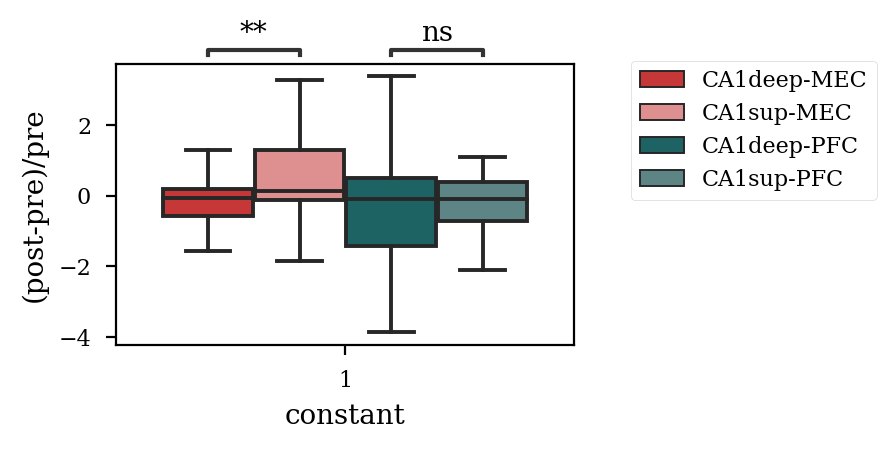

In [393]:
temp_df = results_df_pivot[["(post-pre)/(post+pre)","(post-pre)/pre", "cross_region_label", "basepath" , "constant"]]

temp_df = temp_df[
    (temp_df.basepath == r"Z:\Data\HMC1\day10")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.171_188")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.133_141")
    | (temp_df.basepath == r"Z:\Data\HMC1\day14")
    | (temp_df.basepath == r"Z:\Data\HMC1\day9")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.390_405")
    | (temp_df.basepath == r"Z:\Data\HMC1\day13")
    | (temp_df.basepath == r"Z:\Data\AYAold\AYA9\day12")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.271_287")
    | (temp_df.basepath == r"Z:\Data\AYAold\AYA9\day15")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.532_540")
    | (temp_df.basepath == r"Z:\Data\HMC2\day4")
    | (temp_df.basepath == r"Z:\Data\HMC2\day5")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec013.634_653")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.267_278")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.192_204")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.628_645")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.254_269")
    | (temp_df.basepath == r"Z:\Data\HMC2\day9")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.491_508")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.207_234")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.425_437")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec016.577_590")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec013.451_470")
    & (temp_df.basepath != r"Z:\Data\FujisawaS\EE\EE0627fm")
    & (temp_df.basepath != r"Z:\Data\FujisawaS\EE\EE0708fm")
    & (temp_df.basepath != r"Z:\Data\ORproject\OR18\day2")
    & (temp_df.basepath != r"Z:\Data\HMC2\day11")
]
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.5, subplots=(1, 1)), edgecolor=None
)
results_df["constant"] = 1
sns.boxplot(
    y="(post-pre)/pre",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
    data=temp_df,
    showfliers=False,
)
# sns.stripplot(
#     y="(post-pre)/pre",
#     x="constant",
#     hue="cross_region_label",
#     hue_order=group_colors.keys(),
#     data=temp_df,
#     dodge=True,
#     color="k"
# )
plt.legend(bbox_to_anchor=(1.1, 1.05))

box_pairs = [
    ((1, "CA1deep-MEC"),(1, "CA1sup-MEC")),
    ((1, "CA1deep-PFC"),(1, "CA1sup-PFC"))
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=temp_df,
    y="(post-pre)/pre",
    x="constant",
    hue="cross_region_label",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.show()

In [346]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

temp_df = results_df_pivot.query("cross_region_label.str.contains('CA1deep-MEC|CA1sup-MEC')")[["(post-pre)/(post+pre)","cross_region_label","basepath","animal_id"]]
# temp_df["weight"] = 6
# temp_df = functions.reindex_df(temp_df,"weight")
temp_df = temp_df[
    (temp_df.basepath == r"Z:\Data\HMC1\day10")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.171_188")
    | (temp_df.basepath == r"Z:\Data\Kenji\ec014.133_141")
    | (temp_df.basepath == r"Z:\Data\HMC1\day14")
    | (temp_df.basepath == r"Z:\Data\HMC1\day9")
]

temp_df["y_trans"] = (temp_df["(post-pre)/(post+pre)"]+1)**-4.242424
lbl=LabelEncoder()
temp_df['basepath_encoded'] = lbl.fit_transform(temp_df[['basepath']])
temp_df['animal_id_encoded'] = lbl.fit_transform(temp_df[['animal_id']])
temp_df['cross_region_label_encoded'] = lbl.fit_transform(temp_df[['cross_region_label']])

temp_df["Intercept"] = 1
exog = temp_df[["Intercept", "cross_region_label_encoded"]]
md = sm.MixedLM(temp_df["y_trans"], exog, groups=temp_df["basepath_encoded"], exog_re=exog["Intercept"])
mdf = md.fit(reml=False)
print(mdf.summary())

c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
c:\Users\Cornell

                Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      y_trans
No. Observations:       30           Method:                  ML     
No. Groups:             5            Scale:                   0.0019 
Min. group size:        1            Log-Likelihood:          51.6103
Max. group size:        12           Converged:               No     
Mean group size:        6.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.967    0.010 96.884 0.000  0.948  0.987
cross_region_label_encoded -0.011    0.019 -0.566 0.571 -0.048  0.026
Intercept Var               0.000    0.011                           



c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.139982
c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


In [ ]:
0.0001272 